<a href="https://colab.research.google.com/github/AryanGKulkarni/Math-Equation-solver/blob/master/Math_Equation_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall opencv-python

In [ ]:
!pip install opencv-python==3.4.2.17

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [5]:
dataset = pd.read_csv("/content/mnist_test.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [6]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (1734, 784)
culoms count: 784
784 = 28X28


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


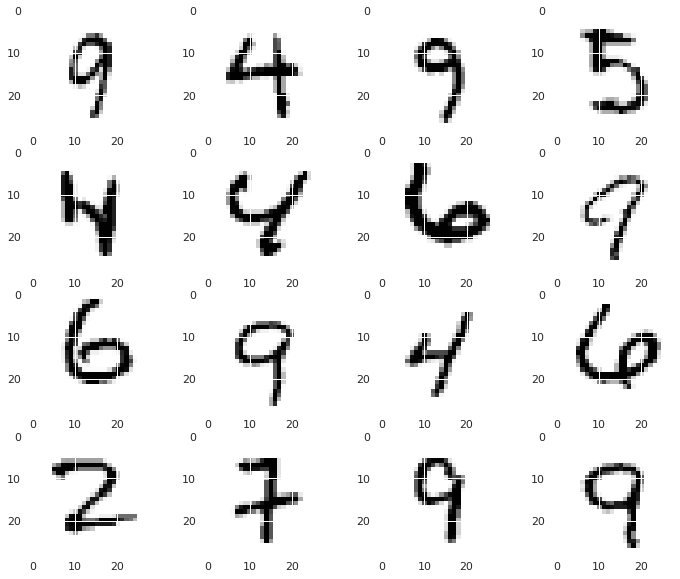

In [7]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()


In [ ]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


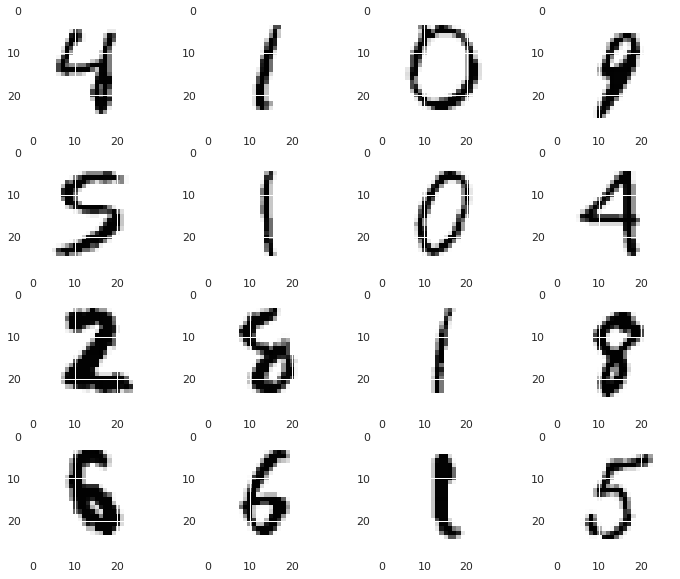

In [9]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [43]:
'''model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])'''

## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=5, activation='relu')
layer_3 = MaxPooling2D(pool_size=(2, 2))
layer_4 = Dropout(0.3)
layer_5 = Flatten()
layer_6 = Dense(128, activation='relu')
layer_7 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

Epoch 1/18
7/7 - 5s - loss: 1.7914 - accuracy: 0.4923 - val_loss: nan - val_accuracy: 0.7051 - 5s/epoch - 768ms/step
Epoch 2/18
7/7 - 5s - loss: 0.6839 - accuracy: 0.7900 - val_loss: nan - val_accuracy: 0.8456 - 5s/epoch - 665ms/step
Epoch 3/18
7/7 - 5s - loss: 0.4526 - accuracy: 0.8738 - val_loss: nan - val_accuracy: 0.8733 - 5s/epoch - 668ms/step
Epoch 4/18
7/7 - 5s - loss: 0.3257 - accuracy: 0.8931 - val_loss: nan - val_accuracy: 0.8940 - 5s/epoch - 662ms/step
Epoch 5/18
7/7 - 5s - loss: 0.2433 - accuracy: 0.9262 - val_loss: nan - val_accuracy: 0.9009 - 5s/epoch - 675ms/step
Epoch 6/18
7/7 - 5s - loss: 0.1773 - accuracy: 0.9500 - val_loss: nan - val_accuracy: 0.9332 - 5s/epoch - 661ms/step
Epoch 7/18
7/7 - 5s - loss: 0.1151 - accuracy: 0.9677 - val_loss: nan - val_accuracy: 0.9194 - 5s/epoch - 664ms/step
Epoch 8/18
7/7 - 5s - loss: 0.0904 - accuracy: 0.9731 - val_loss: nan - val_accuracy: 0.9286 - 5s/epoch - 662ms/step
Epoch 9/18
7/7 - 5s - loss: 0.0699 - accuracy: 0.9785 - val_loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26), range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size




----------------Contoured Image--------------------


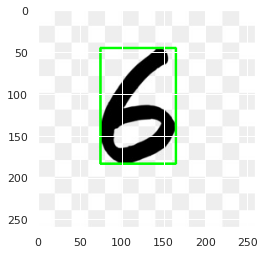

In [47]:
image = cv2.imread('/content/kisspng-logo-brand-number-5afc42c172ef43.0837446015264816014708.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




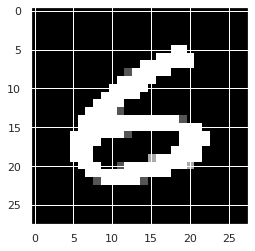



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------




In [48]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")